## Import

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
climate = pd.read_csv('Climate_Zone_of_each_country.csv')
#population = pd.read_csv('FAOSTAT_data_Annual_Population_2009-2018.csv')
food_balance = pd.read_csv('FAOSTAT_data_Food_Balance_2009-2013.csv')
food_balance2 = pd.read_csv('FAOSTAT_data_Food_Balance_2014-2018.csv')
fertilizer = pd.read_csv('FAOSTAT_Fertilizer.csv')
pesticides = pd.read_csv('FAOSTAT_Pesticides.csv')

In [67]:
crop = pd.read_csv('Production_Crops_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')

In [207]:
food_balance

,Area,Element,Item,Year,Value
0,Afghanistan,Food,Wheat and products,2009,4538.0
1,Afghanistan,Food,Wheat and products,2010,4605.0
2,Afghanistan,Food,Wheat and products,2011,4711.0
3,Afghanistan,Food,Wheat and products,2012,4810.0
4,Afghanistan,Food,Wheat and products,2013,4895.0
...,...,...,...,...,...
74514,Zimbabwe,Food,Miscellaneous,2014,42.0
74515,Zimbabwe,Food,Miscellaneous,2015,46.0
74516,Zimbabwe,Food,Miscellaneous,2016,33.0
74517,Zimbabwe,Food,Miscellaneous,2017,19.0


## EDA

## Data exploration and pre-processing

# climate

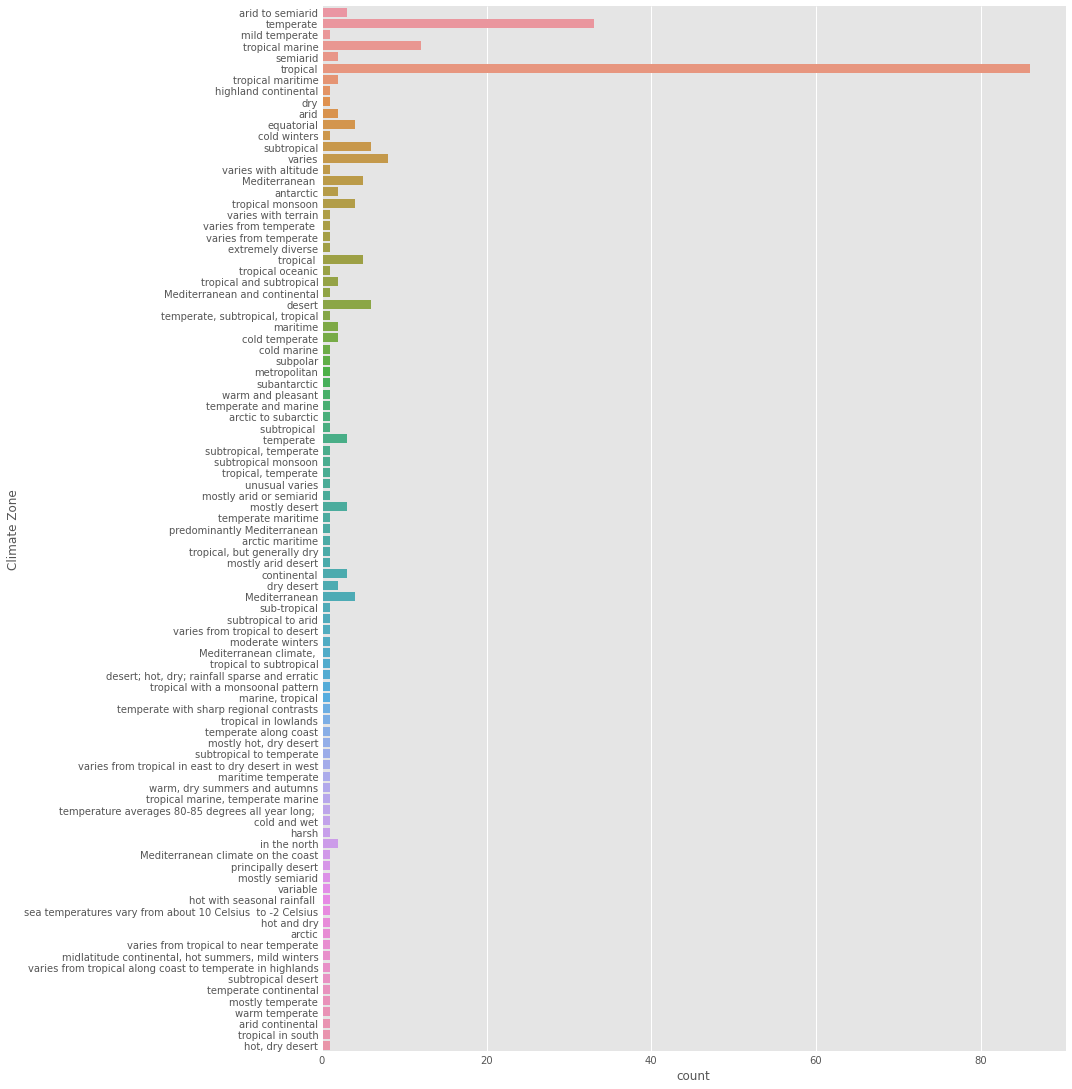

In [130]:
c = climate['Climate Zone'].unique()
#print(c)
c =pd.DataFrame(c,columns=['Climate_Zone'])
climate.drop(climate[(climate['Country']=="Antarctica")].index | climate[(climate['Country']=="Arctic Ocean" )].index | climate[(climate['Country']=="Atlantic Ocean" )].index,axis=0,inplace=True)
climate.drop(climate[(climate['Climate Zone']=="tropical; hot, humid; rainy season (May to November) has strong southeast winds; dry season (December to April) dominated by hot, dry, harmattan wind")].index | climate[(climate['Climate Zone']=="Saint Helena - tropical; marine; mild, tempered by trade winds; Tristan da Cunha - temperate; marine, mild, tempered by trade winds (tends to be cooler than Saint Helena)" )].index,axis=0,inplace=True)
sns.catplot(y = "Climate Zone",kind="count",data = climate, height=15, aspect=1)

# food balance

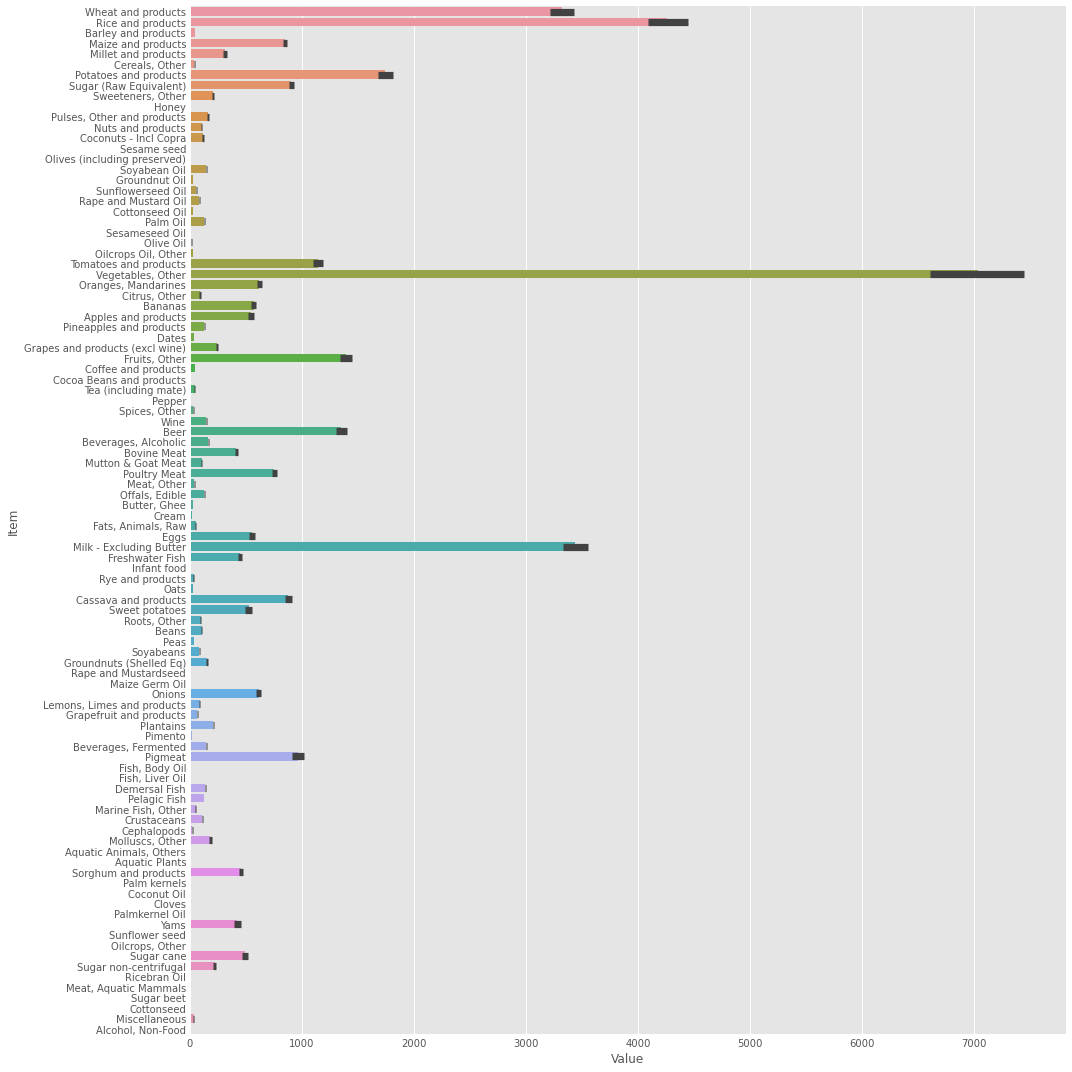

In [184]:
frames = [food_balance,food_balance2]
food_balance=pd.concat(frames)
food_balance = food_balance.drop(['Domain Code','Domain','Area Code','Element Code','Item Code','Year Code','Flag','Flag Description','Unit'],axis=1)
food_balance
#fb = food_balance.groupby(['Area','Item'])['Value'].sum()

#x = fb['Item']
#y = fb['Value']
#fig = plt.figure(figsize = (10,7))
#plt.bar(x,y)
ax = sns.catplot(x='Value',y='Item',data = food_balance,kind="bar",height = 15,aspect=1)

# pesticides

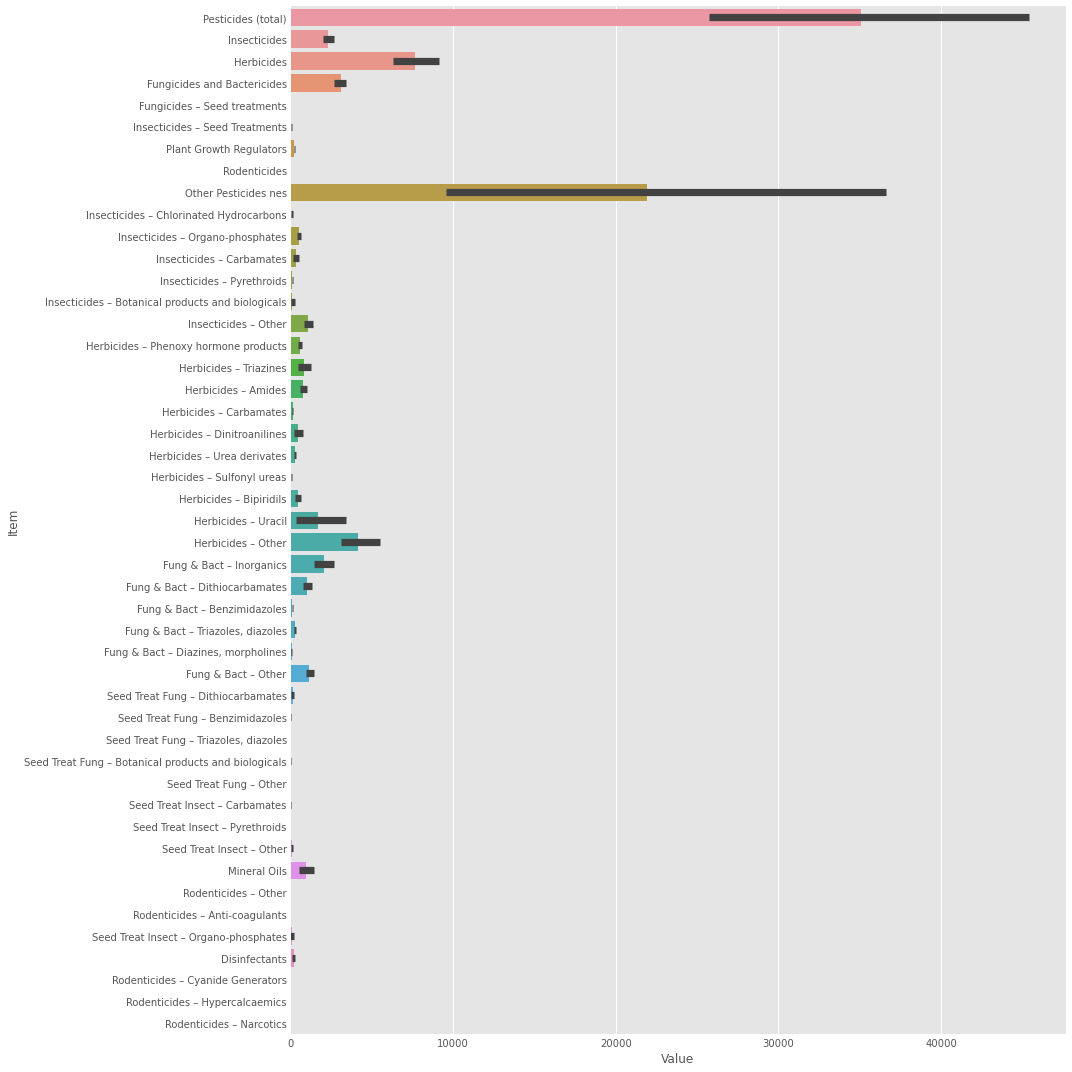

In [188]:
pesticides
ax = sns.catplot(x='Value',y='Item',data = pesticides,kind="bar",height = 15,aspect=1)

# Fertilizer

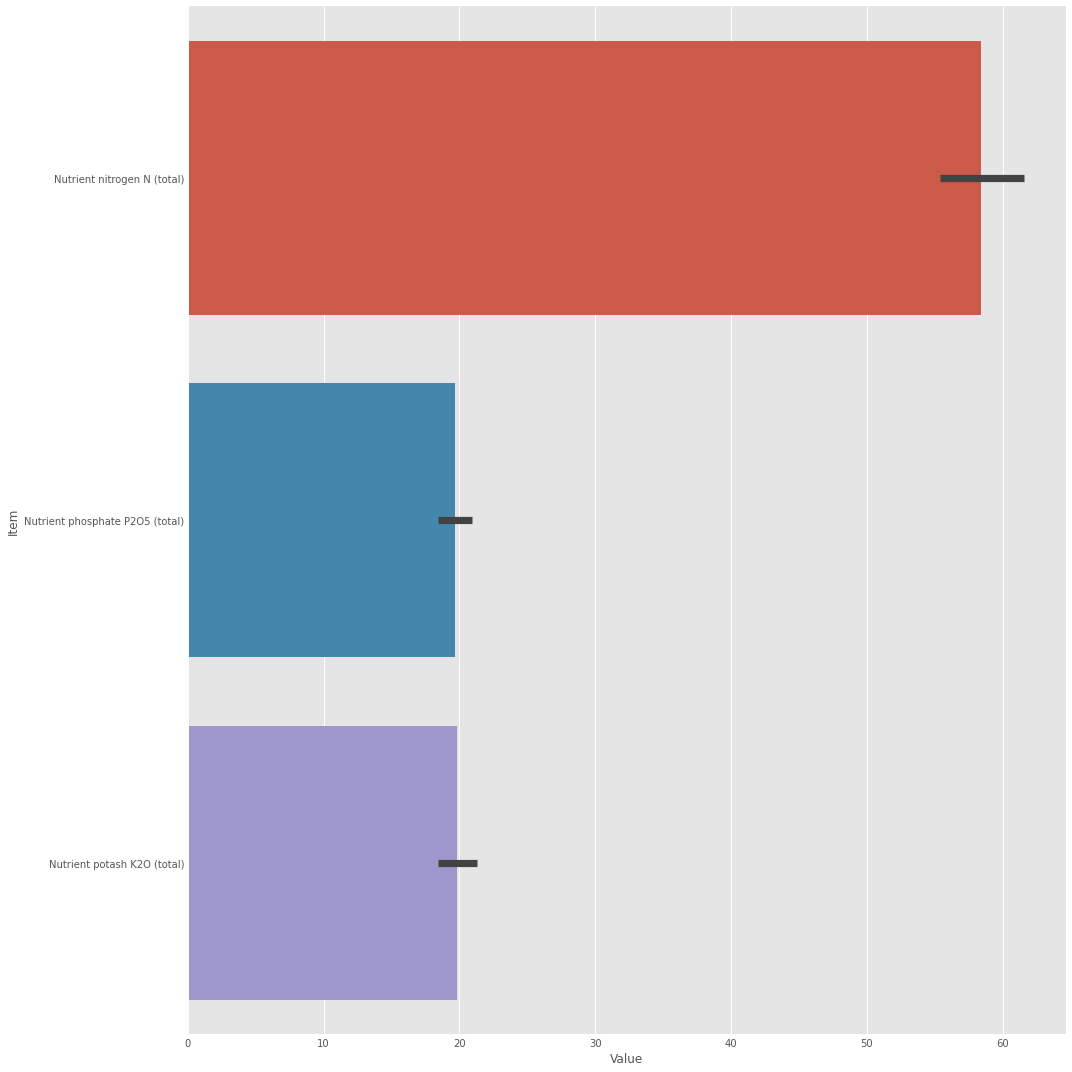

In [189]:
fertilizer
ax = sns.catplot(x='Value',y='Item',data = fertilizer,kind="bar",height = 15,aspect=1)

# Crops

In [202]:
crop = crop[:37790]
crops=crop[['Area','Item','Unit','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018']]
crops_area_sum = crop.fillna(0)
crop.fillna(0,inplace=True)
crops = crops[crops['Unit']=="tonnes"]
crops

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
2,Afghanistan,"Almonds, with shell",tonnes,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
5,Afghanistan,"Anise, badian, fennel, coriander",tonnes,11008.0,10200.0,12508.0,12500.0,12500.0,21500.0,18000.0,18040.0,19180.0,18143.0
8,Afghanistan,Apples,tonnes,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0,89733.0,140903.0,175000.0,217192.0
11,Afghanistan,Apricots,tonnes,60000.0,66560.0,67995.0,83500.0,90000.0,90000.0,87686.0,17894.0,131816.0,18510.0
14,Afghanistan,Barley,tonnes,486000.0,437000.0,305900.0,504000.0,514000.0,521000.0,403000.0,301856.0,94995.0,56781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37777,Zimbabwe,"Pulses, Total",tonnes,34394.0,35744.0,20737.0,26185.0,34333.0,19941.0,19910.0,14899.0,19488.0,18346.0
37780,Zimbabwe,"Roots and Tubers, Total",tonnes,265301.0,274446.0,279697.0,286200.0,291200.0,295590.0,303924.0,308936.0,314633.0,320323.0
37783,Zimbabwe,Sugar Crops Primary,tonnes,2338300.0,2692000.0,3058000.0,3929056.0,3960000.0,3856000.0,3348000.0,3483000.0,3452116.0,3305073.0
37786,Zimbabwe,"Treenuts, Total",tonnes,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0


In [203]:
crops = crops.fillna(0)
filter_column = list(crops)
#print(filter_column)
filter_column.remove('Area')
filter_column.remove('Item')
filter_column.remove('Unit')
crops['sum_crops'] = crops[filter_column].sum(axis=1)
crops.info()
#print(filter_column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12945 entries, 2 to 37789
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       12945 non-null  object 
 1   Item       12945 non-null  object 
 2   Unit       12945 non-null  object 
 3   Y2009      12945 non-null  float64
 4   Y2010      12945 non-null  float64
 5   Y2011      12945 non-null  float64
 6   Y2012      12945 non-null  float64
 7   Y2013      12945 non-null  float64
 8   Y2014      12945 non-null  float64
 9   Y2015      12945 non-null  float64
 10  Y2016      12945 non-null  float64
 11  Y2017      12945 non-null  float64
 12  Y2018      12945 non-null  float64
 13  sum_crops  12945 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.5+ MB


In [204]:
crops.describe()

,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,sum_crops
count,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04
mean,1.497243e+06,1.522433e+06,1.602595e+06,1.617471e+06,1.685953e+06,1.718609e+06,1.736044e+06,1.755016e+06,1.790426e+06,1.790674e+06,1.671646e+07
std,1.538247e+07,1.576217e+07,1.641910e+07,1.653027e+07,1.728912e+07,1.730768e+07,1.793518e+07,1.828204e+07,1.819396e+07,1.828484e+07,1.711063e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.950000e+02,7.010000e+02,7.270000e+02,7.450000e+02,7.510000e+02,7.580000e+02,7.890000e+02,8.140000e+02,8.000000e+02,8.070000e+02,9.028000e+03
50%,1.332900e+04,1.370400e+04,1.409300e+04,1.406400e+04,1.438400e+04,1.474000e+04,1.493900e+04,1.518100e+04,1.525900e+04,1.551100e+04,1.546560e+05
75%,1.515300e+05,1.522070e+05,1.580140e+05,1.580920e+05,1.613540e+05,1.620000e+05,1.640000e+05,1.639930e+05,1.688700e+05,1.720350e+05,1.662879e+06
max,6.916061e+08,7.174638e+08,7.340061e+08,7.210773e+08,7.680904e+08,7.361085e+08,7.502903e+08,7.685942e+08,7.586462e+08,7.468282e+08,7.392711e+09


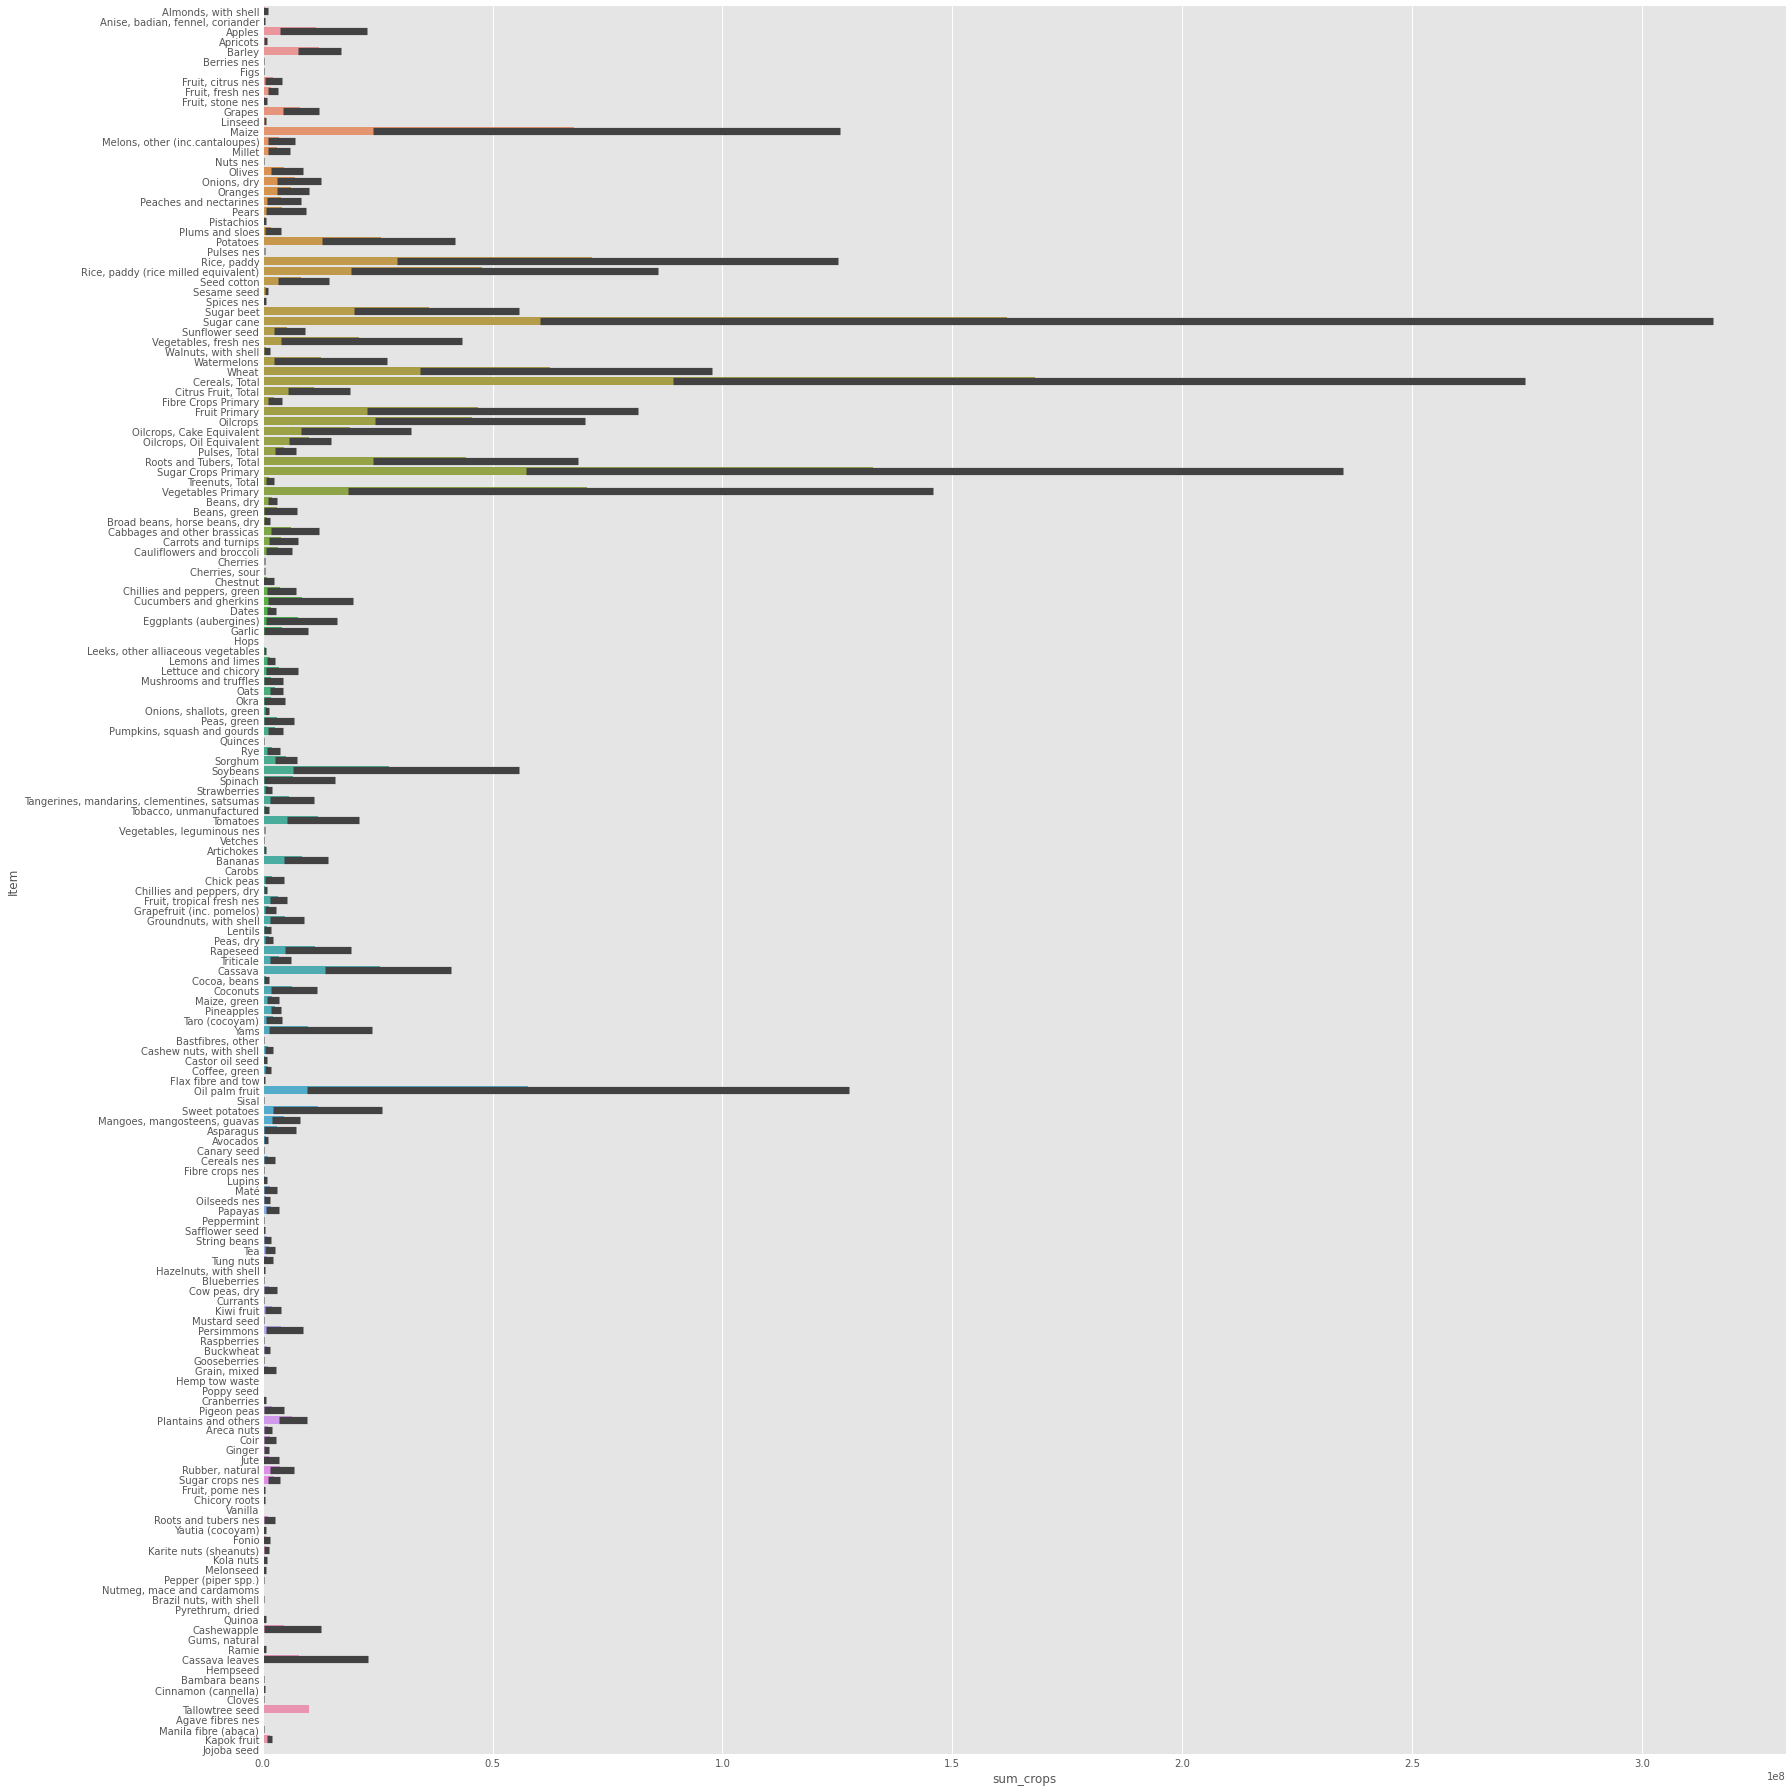

In [205]:
ax = sns.catplot(x='sum_crops',y='Item',data = crops,kind="bar",height = 25,aspect=1)

# Question 1 What are the top 5 high demand food by referring to food balance datasets?

In [61]:
food_balance['Item'].unique()

array(['Wheat and products', 'Rice and products', 'Barley and products',
       'Maize and products', 'Millet and products', 'Cereals, Other',
       'Potatoes and products', 'Sugar (Raw Equivalent)',
       'Sweeteners, Other', 'Honey', 'Pulses, Other and products',
       'Nuts and products', 'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine Meat', 'Mutton & Goat Meat',
       'Poult

In [9]:
food_balance.iloc[food_balance['Value'].argsort()[-3:]]

,Area,Element,Item,Year,Value
13153,China,Food,"Vegetables, Other",2017,450576.0
14491,"China, mainland",Food,"Vegetables, Other",2018,451702.0
13154,China,Food,"Vegetables, Other",2018,455116.0


In [10]:
highest_demand_crops = food_balance.groupby('Item')['Value'].agg('sum').nlargest(5)
highest_demand_crops

Item
Vegetables, Other          11769967.0
Milk - Excluding Butter     6272191.0
Rice and products           6125966.0
Wheat and products          5568366.0
Potatoes and products       2965840.0
Name: Value, dtype: float64

### Then, we take the top 3 high demand crops for further analysis.

# Question 2 What is the total, average and median of selected crops productions?

In [11]:
crops.head()

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,Afghanistan,"Almonds, with shell",ha,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0
1,Afghanistan,"Almonds, with shell",hg/ha,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0
2,Afghanistan,"Almonds, with shell",tonnes,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
3,Afghanistan,"Anise, badian, fennel, coriander",ha,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0
4,Afghanistan,"Anise, badian, fennel, coriander",hg/ha,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0


In [12]:
#to know what kind of crops appeared in datasets
crops['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Figs',
       'Fruit, citrus nes', 'Fruit, fresh nes', 'Fruit, stone nes',
       'Grapes', 'Linseed', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Millet', 'Nuts nes', 'Olives', 'Onions, dry', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Pistachios', 'Plums and sloes',
       'Potatoes', 'Pulses nes', 'Rice, paddy',
       'Rice, paddy (rice milled equivalent)', 'Seed cotton',
       'Sesame seed', 'Spices nes', 'Sugar beet', 'Sugar cane',
       'Sunflower seed', 'Vegetables, fresh nes', 'Walnuts, with shell',
       'Watermelons', 'Wheat', 'Cereals, Total', 'Citrus Fruit, Total',
       'Fibre Crops Primary', 'Fruit Primary', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary',
       'Treenuts, Total', 'Vegetables Primary', 'Beans, dry',
       'Beans,

In [219]:
vrw = crops[(crops['Item']=='Vegetables Primary') | (crops['Item']=='Rice, paddy') | (crops['Item']=='Wheat')]
#total
total_of_vege = crops.loc[crops['Item']=='Vegetables Primary', 'sum_crops'].sum()
print("total of vegetables is ", total_of_vege)
#average
num_of_vege_apperance = len(crops.loc[crops['Item']=='Vegetables Primary'])
print("number of appearance of vegetables : ",num_of_vege_apperance)
print("average of vegetables is ", total_of_vege/num_of_vege_apperance)
#median
median_of_vege = crops.loc[crops['Item']=='Vegetables Primary', 'sum_crops'].median()
print("median of vegetables is ", median_of_vege)

total of vegetables is  15143590896.0
number of appearance of vegetables :  215
average of vegetables is  70435306.49302326
median of vegetables is  3457186.0


In [18]:
#total
total_of_rice = crops.loc[crops['Item']=='Rice, paddy', 'sum_crops'].sum()
print("total of Rice, paddy is ", total_of_rice)
#average
num_of_rice_apperance = len(crops.loc[crops['Item']=='Rice, paddy'])
print("number of appearance of Rice, paddy : ",num_of_rice_apperance)
print("average of Rice, paddy is ", total_of_rice/num_of_rice_apperance)
#median
median_of_rice = crops.loc[crops['Item']=='Rice, paddy', 'sum_crops'].median()
print("median of Rice, paddy is ", median_of_rice)

total of Rice, paddy is  11440588049.0
number of appearance of Rice, paddy :  392
average of Rice, paddy is  29185173.594387755
median of Rice, paddy is  469451.5


In [19]:
#total
total_of_Wheat = crops.loc[crops['Item']=='Wheat', 'sum_crops'].sum()
print("total of Wheat is ", total_of_Wheat)
#average
num_of_Wheat_apperance = len(crops.loc[crops['Item']=='Wheat'])
print("number of appearance of Wheat : ",num_of_Wheat_apperance)
print("average of Wheat is ", total_of_Wheat/num_of_Wheat_apperance)
#median
median_of_Wheat = crops.loc[crops['Item']=='Wheat', 'sum_crops'].median()
print("median of Wheat is ", median_of_Wheat)

total of Wheat is  10856342532.0
number of appearance of Wheat :  401
average of Wheat is  27073173.396508727
median of Wheat is  426472.0


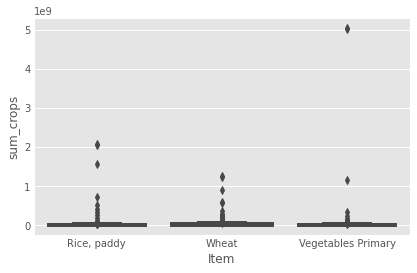

In [222]:
ax = sns.boxplot(x="Item", y="sum_crops", data=vrw)
#ax = sns.boxplot(orient="h", data=vege)

# Question 3 What are the countries with crop production of each type of selected crops lower than the median?

In [20]:
vege = crops.loc[(crops['Item']=='Vegetables Primary') & (crops['sum_crops']<median_of_vege),'Area']
print(vege.unique())
print(len(vege),"out of total countries lower than median")

['Afghanistan' 'Albania' 'American Samoa' 'Angola' 'Antigua and Barbuda'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile'
 'China, Hong Kong SAR' 'China, Macao SAR' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cyprus' 'Czechia'
 'Czechoslovakia' 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Eritrea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Ethiopia PDR' 'Fiji' 'Finland'
 'French Guyana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Ghana'
 'Greece' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungar

In [21]:
rice = crops.loc[(crops['Item']=='Rice, paddy') & (crops['sum_crops']<median_of_rice),'Area']
print(rice.unique())
print(len(rice),"out of total countries lower than median")

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Armenia' 'Azerbaijan'
 'Bangladesh' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'China, Hong Kong SAR' 'Comoros' 'Congo' 'Costa Rica' "Côte d'Ivoire"
 'Cuba' 'Democratic Republic of the Congo' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Eswatini' 'Ethiopia' 'Fiji' 'France' 'French Guyana'
 'Gabon' 'Gambia' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India'
 'Iran (Islamic Republic of)' 'Iraq' 'Jamaica' 'Kazakhstan' 'Kenya'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Liberia' 'Madagascar'
 'Malawi' 'Malaysia' 'Mali' 'Mauritania' 'Mauritius' 'Mexico'
 'Micronesia (Federated States of)' 'Morocco' 'Mozambique' 'Myanmar'
 'Nepal' 'New Zealand' 'Niger' 'Nigeria' 'North Macedonia'
 'Pacific Islands Trust Territory' 'Pakistan' 'Panama' 'Papua New Guinea'

In [22]:
wheat = crops.loc[(crops['Item']=='Wheat') & (crops['sum_crops']<median_of_Wheat),'Area']
print(wheat.unique())
print(len(wheat),"out of total countries lower than median")

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium-Luxembourg'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burundi' 'Cameroon' 'Canada' 'Chad'
 'China, Taiwan Province of' 'Colombia' 'Cyprus' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Ecuador' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Ethiopia PDR' 'Finland' 'Georgia' 'Greece'
 'Guatemala' 'Honduras' 'India' 'Iran (Islamic Republic of)' 'Iraq'
 'Israel' 'Italy' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Lesotho' 'Libya' 'Luxembourg'
 'Madagascar' 'Malawi' 'Mali' 'Malta' 'Mauritania' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'New Caledonia'
 'Niger' 'Nigeria' 'North Macedonia' 'Norway' 'Oman' 'Pakistan'
 'Palestine' 'Paraguay' 'Peru' 'Portugal' 'Qatar' 'Republic of Korea'
 'Republic 

In [23]:
def intersection(lst1, lst2,lst3): 
    return list(set(lst1) & set(lst2) & set(lst3))

##print out countries that having three high semand crops lower than median
print(intersection(vege,rice,wheat)) 

['South Sudan', 'Nigeria', 'North Macedonia', 'Sudan', 'Ethiopia', 'Zimbabwe', 'Zambia', 'Mauritania', 'Malawi', 'United Republic of Tanzania', 'Turkmenistan', 'Chad', 'Guatemala', 'Albania', 'Afghanistan', 'Uganda', 'Ecuador', 'Madagascar', 'Azerbaijan', 'Sudan (former)', 'USSR', 'Democratic Republic of the Congo', 'Bolivia (Plurinational State of)', 'Greece', 'Tajikistan', 'Bulgaria', 'Somalia', 'Kyrgyzstan', 'Armenia', 'Bhutan', 'Portugal', 'Venezuela (Bolivarian Republic of)', 'Thailand', 'Burundi', 'Cameroon', 'Eswatini', 'Republic of Moldova', 'Honduras', 'Yugoslav SFR', 'Angola', 'Mozambique', 'Bangladesh', 'Rwanda']


# Question 4 What are the top 5 countries that harvest the most of the selected crops in the world?

In [24]:
country_vege = crops[crops['Item']=='Vegetables Primary'].groupby('Area')['sum_crops'].sum()
cv = country_vege.nlargest(5)

In [25]:
country_rice = crops[crops['Item']=='Rice, paddy'].groupby('Area')['sum_crops'].sum()
cr = country_rice.nlargest(5)

In [26]:
country_wheat = crops[crops['Item']=='Wheat'].groupby('Area')['sum_crops'].sum()
cw = country_wheat.nlargest(5)

In [27]:
print(cv)
print(cr)
print(cw)

Area
China                       5.272938e+09
China, mainland             5.247648e+09
India                       1.232855e+09
United States of America    3.558716e+08
Turkey                      2.387987e+08
Name: sum_crops, dtype: float64
Area
China              2.376939e+09
China, mainland    2.357722e+09
India              2.008078e+09
Indonesia          8.686578e+08
Bangladesh         6.304720e+08
Name: sum_crops, dtype: float64
Area
China                       1.492475e+09
China, mainland             1.492400e+09
India                       1.207451e+09
Russian Federation          8.513563e+08
United States of America    7.503261e+08
Name: sum_crops, dtype: float64


# 5. i. What types of crops are planted in each climate zone? 

In [28]:
climate.head()

,Country,Climate Zone,Description
0,Afghanistan,arid to semiarid,cold winters and hot summers
1,Akrotiri,temperate,"Mediterranean with hot, dry summers and cool w..."
2,Albania,mild temperate,"cool, cloudy, wet winters; hot, clear, dry sum..."
3,Algeria,arid to semiarid,"mild, wet winters with hot, dry summers along ..."
4,American Samoa,tropical marine,moderated by southeast trade winds; annual rai...


In [29]:
#climate['Country']==crops['Area']
#extract Area and Item from crops
#merge with climate
crops_sub = crops[['Area','Item']]
crops_sub.columns=['Country','Item']

In [30]:
result3= pd.merge(climate,crops_sub,how="inner",on=['Country'])
result3

,Country,Climate Zone,Description,Item
0,Afghanistan,arid to semiarid,cold winters and hot summers,"Almonds, with shell"
1,Afghanistan,arid to semiarid,cold winters and hot summers,"Almonds, with shell"
2,Afghanistan,arid to semiarid,cold winters and hot summers,"Almonds, with shell"
3,Afghanistan,arid to semiarid,cold winters and hot summers,"Anise, badian, fennel, coriander"
4,Afghanistan,arid to semiarid,cold winters and hot summers,"Anise, badian, fennel, coriander"
...,...,...,...,...
30454,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,"Treenuts, Total"
30455,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,"Treenuts, Total"
30456,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,Vegetables Primary
30457,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,Vegetables Primary


In [31]:
df = result3.groupby(by='Climate Zone',as_index=True)['Item']
df = pd.DataFrame(df,columns=['Climate Zone','Item'])
df

,Climate Zone,Item
0,Mediterranean,"15927 Almonds, with shell 1592..."
1,Mediterranean,"3376 Almonds, with shell 3377..."
2,Mediterranean and continental,"6656 Almonds, with shell 6657 Almonds, w..."
3,Mediterranean climate on the coast,"25231 Almonds, with shell 25232 Almonds,..."
4,"Mediterranean climate,",18719 Apples 18720 ...
...,...,...
67,varies from tropical in east to dry desert in ...,"21736 Almonds, with shell 2173..."
68,varies from tropical to desert,18271 Agave fibres nes 18272 Agave...
69,varies with terrain,4619 Apricots 4620 A...
70,warm and pleasant,"10084 Almonds, with shell 1008..."


# ii. Which climate zones are suitable for the selected crops?

In [32]:
#vegetables

df2 = result3[result3['Item']=='Vegetables Primary'].groupby('Climate Zone')['Item']
df2 = pd.DataFrame(df2,columns=['Climate Zone','Item'])
df2['Climate Zone'].unique()

array(['Mediterranean', 'Mediterranean ', 'Mediterranean and continental',
       'Mediterranean climate on the coast', 'Mediterranean climate, ',
       'arid', 'arid continental', 'arid to semiarid', 'cold and wet',
       'cold temperate', 'cold winters', 'continental', 'desert',
       'desert; hot, dry; rainfall sparse and erratic', 'dry',
       'dry desert', 'equatorial', 'extremely diverse', 'harsh',
       'highland continental', 'hot and dry',
       'hot with seasonal rainfall ', 'in the north', 'maritime',
       'maritime temperate', 'metropolitan',
       'midlatitude continental, hot summers, mild winters',
       'mild temperate', 'mostly arid desert', 'mostly desert',
       'mostly hot, dry desert', 'mostly semiarid',
       'predominantly Mediterranean', 'principally desert', 'semiarid',
       'sub-tropical', 'subtropical', 'subtropical ',
       'subtropical desert', 'subtropical to arid',
       'subtropical to temperate', 'subtropical, temperate', 'temperate',
  

In [33]:
df3 = result3[result3['Item']=='Rice, paddy'].groupby('Climate Zone')['Item']
df3 = pd.DataFrame(df3,columns=['Climate Zone','Item'])
df3['Climate Zone'].unique()

array(['Mediterranean', 'arid continental', 'arid to semiarid',
       'continental', 'desert', 'dry', 'equatorial', 'extremely diverse',
       'harsh', 'highland continental', 'hot and dry',
       'hot with seasonal rainfall ', 'maritime temperate',
       'metropolitan',
       'midlatitude continental, hot summers, mild winters',
       'mild temperate', 'mostly desert', 'mostly hot, dry desert',
       'mostly semiarid', 'predominantly Mediterranean',
       'principally desert', 'semiarid', 'sub-tropical',
       'subtropical desert', 'subtropical to arid',
       'subtropical to temperate', 'subtropical, temperate', 'temperate',
       'temperate continental', 'temperate with sharp regional contrasts',
       'tropical', 'tropical ', 'tropical and subtropical',
       'tropical in lowlands', 'tropical marine', 'tropical maritime',
       'tropical monsoon', 'tropical to subtropical',
       'tropical, temperate',
       'tropical; hot, humid; rainy season (May to November) has 

In [34]:
df4 = result3[result3['Item']=='Wheat'].groupby('Climate Zone')['Item']
df4 = pd.DataFrame(df4,columns=['Climate Zone','Item'])
df4['Climate Zone'].unique()

array(['Mediterranean', 'Mediterranean ', 'Mediterranean and continental',
       'Mediterranean climate on the coast', 'Mediterranean climate, ',
       'arid', 'arid continental', 'arid to semiarid', 'cold temperate',
       'cold winters', 'continental', 'desert',
       'desert; hot, dry; rainfall sparse and erratic', 'dry',
       'dry desert', 'equatorial', 'extremely diverse', 'harsh',
       'highland continental', 'hot and dry',
       'hot with seasonal rainfall ', 'in the north', 'maritime',
       'maritime temperate', 'metropolitan',
       'midlatitude continental, hot summers, mild winters',
       'mild temperate', 'mostly arid desert', 'mostly desert',
       'mostly hot, dry desert', 'mostly semiarid',
       'predominantly Mediterranean', 'principally desert', 'semiarid',
       'sub-tropical', 'subtropical desert', 'subtropical to arid',
       'subtropical to temperate', 'subtropical, temperate', 'temperate',
       'temperate ', 'temperate along coast', 'temperate

## Question 6 i. What are the total, average and median of fertilizers usage of selected countries? (take intersection)

In [35]:
fer = fertilizer.loc[(fertilizer['Area']=='China') | (fertilizer['Area']=='China, mainland') | (fertilizer['Area']=='India')]
fer_c = fer.loc[(fer['Area']=='China')]
fer_cm = fer.loc[(fer['Area']=='China, mainland')]
fer_i = fer.loc[(fer['Area']=='India')]
print("For China used fertilizers")
print("sum: ",fer_c['Value'].sum())
print("mean: ",fer_c['Value'].mean())
print("median: ",fer_c['Value'].median())
print("For China, mainland used fertilizers")
print("sum: ",fer_cm['Value'].sum())
print("mean: ",fer_cm['Value'].mean())
print("median: ",fer_cm['Value'].median())
print("For India used fertilizers")
print("sum: ",fer_i['Value'].sum())
print("mean: ",fer_i['Value'].mean())
print("median: ",fer_i['Value'].median())

For China used fertilizers
sum:  3851.4200000000005
mean:  128.38066666666666
median:  100.3
For China, mainland used fertilizers
sum:  3844.06
mean:  128.13533333333334
median:  99.95
For India used fertilizers
sum:  1565.3200000000004
mean:  52.17733333333335
median:  40.795


## ii. What is the relationship between fertilizers usage and total of each type of crops production?

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [37]:
crops

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,sum_crops
0,Afghanistan,"Almonds, with shell",ha,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,151018.0
1,Afghanistan,"Almonds, with shell",hg/ha,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,294304.0
2,Afghanistan,"Almonds, with shell",tonnes,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,410202.0
3,Afghanistan,"Anise, badian, fennel, coriander",ha,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0,225253.0
4,Afghanistan,"Anise, badian, fennel, coriander",hg/ha,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0,67525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,Zimbabwe,"Treenuts, Total",hg/ha,12282.0,12727.0,12688.0,15200.0,17700.0,15254.0,16099.0,17000.0,17598.0,18185.0,154733.0
37786,Zimbabwe,"Treenuts, Total",tonnes,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0,55996.0
37787,Zimbabwe,Vegetables Primary,ha,29519.0,31281.0,31318.0,30547.0,30547.0,31582.0,32636.0,33224.0,33683.0,34082.0,318419.0
37788,Zimbabwe,Vegetables Primary,hg/ha,71327.0,70523.0,66161.0,75405.0,75405.0,73753.0,72439.0,72350.0,72445.0,72661.0,722469.0


In [38]:
fertilizer['Value']
crops_area_sum['sum_crops'] = crops[filter_column].sum(axis=1)
crops_area_sum = crops_area_sum[['Area Code','sum_crops']]
merged_fertilizer= pd.merge(fertilizer,crops_area_sum,how="inner",on=['Area Code'])
merged_fertilizer=merged_fertilizer.groupby('Area Code').mean()
merged_fertilizer = merged_fertilizer[['Value','sum_crops']]
merged_fertilizer = scaler.fit_transform(merged_fertilizer)
merged_fertilizer = pd.DataFrame(merged_fertilizer,columns=['Value','sum_crops'])
merged_fertilizer

,Value,sum_crops
0,0.260468,0.005574
1,0.013582,0.018277
2,0.163964,0.005604
3,0.034998,0.026024
4,0.016107,0.040682
...,...,...
153,0.587037,0.030348
154,0.481250,0.003604
155,0.255230,0.021012
156,0.011589,0.036058


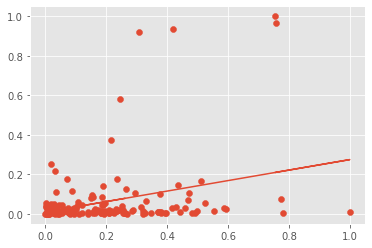

In [39]:
plt.scatter(merged_fertilizer['Value'],merged_fertilizer['sum_crops'])
m,b = np.polyfit(merged_fertilizer['Value'],merged_fertilizer['sum_crops'],1)
plt.plot(merged_fertilizer['Value'],m*merged_fertilizer['Value']+b)
plt.show()
## Conclusion
##smaller usage of fertilizer will better

## Question 7 i. What are the total, average and median of pesticides usage of selected countries?


In [40]:
pest = pesticides.loc[(pesticides['Area']=='China') | (pesticides['Area']=='China, mainland') | (pesticides['Area']=='India')]
pest_c = pest.loc[(pest['Area']=='China')]
pest_cm = pest.loc[(pest['Area']=='China, mainland')]
pest_i = pest.loc[(pest['Area']=='India')]
print("For China used pesticides")
print("sum: ",pest_c['Value'].sum())
print("mean: ",pest_c['Value'].mean())
print("median: ",pest_c['Value'].median())
print("For China, mainland used fertilizers")
print("sum: ",pest_cm['Value'].sum())
print("mean: ",pest_cm['Value'].mean())
print("median: ",pest_cm['Value'].median())
print("For India used fertilizers")
print("sum: ",pest_i['Value'].sum())
print("mean: ",pest_i['Value'].mean())
print("median: ",pest_i['Value'].median())

For China used pesticides
sum:  17814021
mean:  1781402.1
median:  1773684.0
For China, mainland used fertilizers
sum:  35441728
mean:  1772086.4
median:  1763000.0
For India used fertilizers
sum:  958870
mean:  8878.425925925925
median:  881.0


## ii. What is the relationship between pesticides usage and total of each type of crops production of selected countries?

In [41]:
merged_pest= pd.merge(pesticides,crops_area_sum,how="inner",on=['Area Code'])
merged_pest = merged_pest.groupby('Area Code').mean()
merged_pest = merged_pest[['Value','sum_crops']]
merged_pest = scaler.fit_transform(merged_pest)
merged_pest = pd.DataFrame(merged_pest,columns=['Value','sum_crops'])
merged_pest

,Value,sum_crops
0,0.000040,0.006797
1,0.000063,0.006826
2,0.001083,0.027221
3,0.000009,0.041861
4,0.000002,0.001488
...,...,...
164,0.000012,0.004829
165,0.000021,0.004428
166,0.000263,0.037243
167,0.000303,0.005625


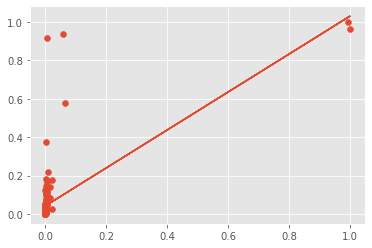

In [42]:
plt.scatter(merged_pest['Value'],merged_pest['sum_crops'])
m,b = np.polyfit(merged_pest['Value'],merged_pest['sum_crops'],1)
plt.plot(merged_pest['Value'],m*merged_pest['Value']+b)
plt.show()

##find correlation value(?)
## plot along heatmap to fulfill data visualization part

## By focusing on Vegetables, Rice,Paddy and Wheat,

## Question 8 

## i. By observing trend, will the crop production be enough for food consumption by calculating in tonnes?

In [43]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

In [44]:
#crops_filtered = crops[crops['Item' == vege, rice and wheat]] [top 5 countries]
list_item = ['Vegetables Primary', 'Rice, paddy','Wheat'] 
#crops['Item'] = crops['Item'].apply(lambda s:s.astype(str))
#crops['Area'] = crops['Item'].apply(lambda s:s.astype(str))
#crops_filtered = np.logical_and(crops['Item']=='Vegetables Primary',crops['Area'] == 'China')
crops_filtered = crops[(crops['Item']=='Vegetables Primary') & ((crops['Area'] == 'China') | (crops['Area'] == 'China, mainland') | (crops['Area'] == 'India')|(crops['Area'] == 'United States of America')|(crops['Area'] == 'Turkey')) & (crops['Unit']=="tonnes")]
crops_filtered2 = crops[(crops['Item']=='Rice, paddy') & ((crops['Area'] == 'China') | (crops['Area'] == 'China, mainland') | (crops['Area'] == 'India')|(crops['Area'] == 'Indonesia')|(crops['Area'] == 'Bangladesh')) & (crops['Unit']=="tonnes")]
crops_filtered3 = crops[(crops['Item']=='Wheat') & ((crops['Area'] == 'China') | (crops['Area'] == 'China, mainland') | (crops['Area'] == 'India')|(crops['Area'] == 'United States of America')|(crops['Area'] == 'Russian Federation')) & (crops['Unit']=="tonnes")]
pdList=[crops_filtered,crops_filtered2,crops_filtered3]
new_crops_filtered= pd.concat(pdList)
new_crops_filtered.drop('sum_crops',axis=1,inplace=True)
new_crops_filtered.drop('Area',axis=1,inplace=True)
#new_crops_filtered.drop('Item',axis=1,inplace=True)
new_crops_filtered.drop('Unit',axis=1,inplace=True)
#new_crops_filtered

In [45]:
index = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
rp = new_crops_filtered.loc[new_crops_filtered['Item'] == 'Rice, paddy']
#print(rp)
rp=rp.mean()
rp=pd.DataFrame(rp,columns=['Values'])
rp_scaled = scaler.fit_transform(rp)
rp_scaled=pd.DataFrame(rp_scaled,columns=['Values'],index=index)
#rp_scaled

In [46]:
rpp = food_balance.loc[(food_balance['Item'] == 'Rice and products') & ((food_balance['Area'] == 'China') | (food_balance['Area'] == 'China, mainland') | (food_balance['Area'] == 'India')|(food_balance['Area'] == 'Indonesia')|(food_balance['Area'] == 'Bangladesh')) ]
rpp = rpp[['Year','Value']]
rpp = rpp.groupby(['Year']).mean()

rpp_scaled = scaler.fit_transform(rpp)
rpp_scaled = pd.DataFrame(rpp_scaled,columns=['Value'],index=index)
#rpp_scaled

In [47]:
wh= new_crops_filtered.loc[new_crops_filtered['Item'] == 'Wheat']
wh = wh.mean()
wh = pd.DataFrame(wh,columns=['Values'])
wh_scaled = scaler.fit_transform(wh)
wh_scaled = pd.DataFrame(wh_scaled,columns=['Values'],index=index)
#wh_scaled

In [48]:
whp = food_balance.loc[(food_balance['Item'] == 'Wheat and products') & ((food_balance['Area'] == 'China') | (food_balance['Area'] == 'China, mainland') | (food_balance['Area'] == 'India')|(food_balance['Area'] == 'United States of America')|(food_balance['Area'] == 'Russian Federation')) ]
whp = whp[['Year','Value']]
whp = whp.groupby(['Year']).mean()

whp_scaled = scaler.fit_transform(whp)
whp_scaled = pd.DataFrame(whp_scaled,columns=['Value'],index = index)
#whp_scaled

In [49]:
vp= new_crops_filtered.loc[new_crops_filtered['Item'] == 'Vegetables Primary']
vp = vp.mean()
vp = pd.DataFrame(vp,columns=['Values'])
vp_scaled = scaler.fit_transform(vp)
vp_scaled = pd.DataFrame(vp_scaled,columns=['Values'],index=index)
vp_scaled
vg = food_balance.loc[(food_balance['Item'] == 'Vegetables, Other') & (food_balance['Area']== 'China') | (food_balance['Area'] == 'China, mainland') | (food_balance['Area'] == 'India')|(food_balance['Area'] == 'United States of America')|(food_balance['Area'] == 'Turkey')]
vg = vg[['Year','Value']]
vg = vg.groupby(['Year']).mean()
#print(vg)
vg_scaled = scaler.fit_transform(vg)
vg_scaled = pd.DataFrame(vg_scaled,columns=['Value'],index = index)
#print(vg_scaled)

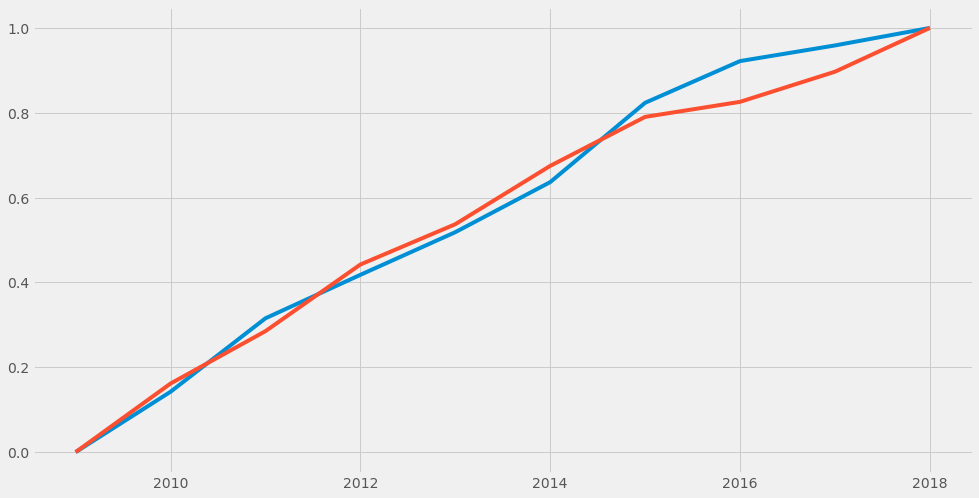

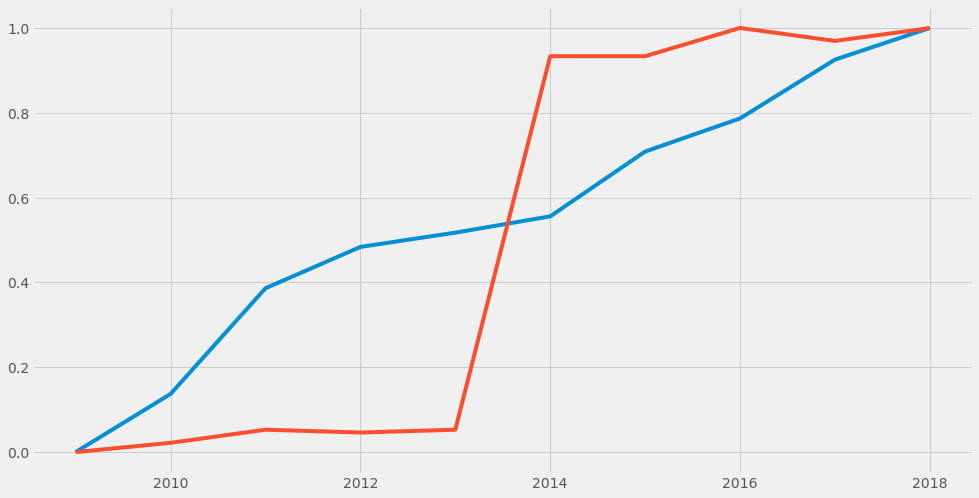

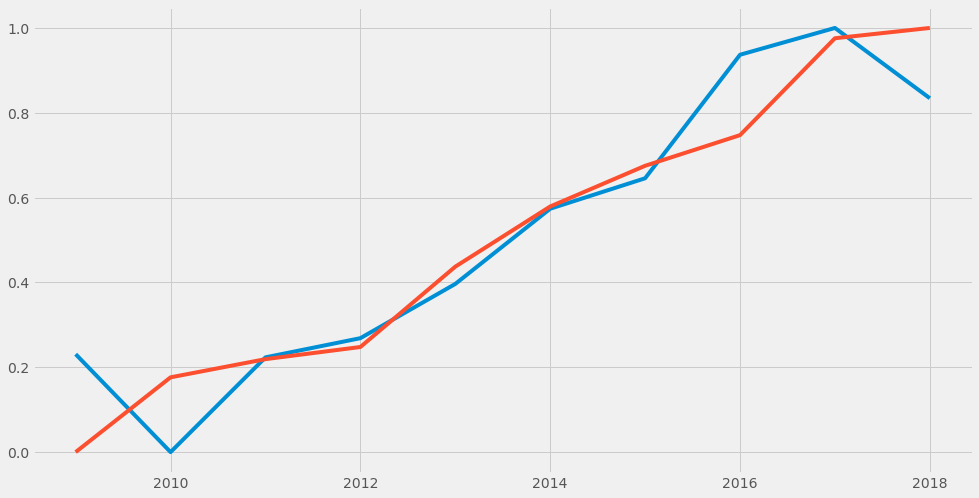

In [50]:
plt.figure(figsize=(15,8))
#vegetables
plt.plot(vp_scaled)
plt.plot(vg_scaled)
#rice and products
plt.figure(figsize=(15,8))
plt.plot(rp_scaled)
plt.plot(rpp_scaled)
#wheat and products
plt.figure(figsize=(15,8))
plt.plot(wh_scaled)
plt.plot(whp_scaled)

## K means clustering


In [51]:
X = crops_area_sum['Area Code']
Y = crops_area_sum['sum_crops']
crops_area_sum

,Area Code,sum_crops
0,2,151018.0
1,2,294304.0
2,2,410202.0
3,2,225253.0
4,2,67525.0
...,...,...
37785,181,154733.0
37786,181,55996.0
37787,181,318419.0
37788,181,722469.0


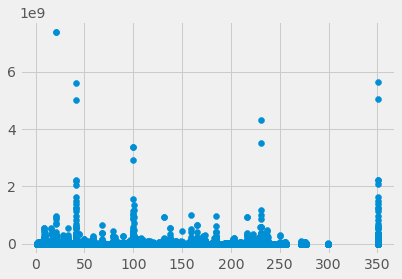

In [52]:
plt.scatter(X,Y)

In [53]:
X=np.array([X,Y])

In [54]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [55]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[2.000000e+00 2.000000e+00 2.000000e+00 ... 1.810000e+02 1.810000e+02
  1.810000e+02]
 [1.510180e+05 2.943040e+05 4.102020e+05 ... 3.184190e+05 7.224690e+05
  2.300418e+06]]
[0 1]


coordinate: [  2.   2.   2. ... 181. 181. 181.] label: 0
coordinate: [ 151018.  294304.  410202. ...  318419.  722469. 2300418.] label: 1


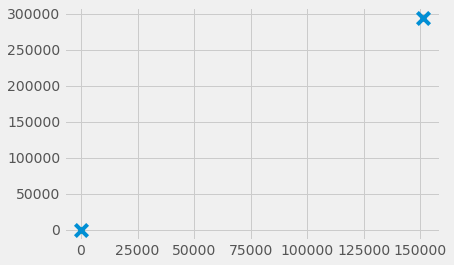

In [56]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()